In [2]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/72.0 MB 7.4 MB/s eta 0:00:10
   - -------------------------------------- 2.3/72.0 MB 13.0 MB/s eta 0:00:06
   - -------------------------------------- 2.7/72.0 MB 13.4 MB/s eta 0:00:06
   -- ------------------------------------- 4.0/72.0 MB 12.1 MB/s eta 0:00:06
   -- ------------------------------------- 4.2/72.0 MB 10.4 MB/s eta 0:00:07
   --- ------------------------------------ 5.5/72.0 MB 10.6 MB/s eta 0:00:07
   --- ------------------------------------ 6.3/72.0 MB 10.1 MB/s eta 0:00:07
   ---- ----------------------------------- 7.3/72.0 MB 10.7 MB/s eta 0:00:07
   ---- ----------------------------------- 8.2/72.0 MB 10.9 MB/s eta 0:00:06
   ---- ----------------------------------- 8.6/72.0 MB 10.9 MB/s eta 0:00:06
   ----- ---------------------------------- 9.6/72.0 MB 11.4 MB/s eta 0:00:06
   ----- ---------------------------------- 10.5/72.0 MB 12.1 MB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [16]:
df = pd.read_csv('data/processed_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: (7043, 21)

First 5 rows:
   ContractScore    tenure  IsNewCustomer  InternetService_Fiber optic  \
0      -0.828207 -1.277445              1                        False   
1       0.371271  0.066327              0                        False   
2      -0.828207 -1.236724              1                        False   
3       0.371271  0.514251              0                        False   
4      -0.828207 -1.236724              1                         True   

   Contract_Two year  PaymentMethod_Electronic check  PaymentRisk  \
0              False                            True            1   
1              False                           False            0   
2              False                           False            0   
3              False                           False            0   
4              False                            True            1   

   StreamingTV_No internet service  OnlineBackup_No internet service  \
0                          

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print("="*60)
print("PREPARING DATA FOR MODEL TRAINING")
print("="*60)

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget percentage:")
print(y.value_counts(normalize=True) * 100)



PREPARING DATA FOR MODEL TRAINING

Features (X) shape: (7043, 20)
Target (y) shape: (7043,)

Target distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

Target percentage:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*60)
print("TRAIN-TEST SPLIT (80-20)")
print("="*60)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTrain set - Churn distribution:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True) * 100)

print(f"\nTest set - Churn distribution:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True) * 100)



TRAIN-TEST SPLIT (80-20)
Training set: 5634 samples (80.0%)
Test set: 1409 samples (20.0%)

Train set - Churn distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64
Churn
0    73.464679
1    26.535321
Name: proportion, dtype: float64

Test set - Churn distribution:
Churn
0    1035
1     374
Name: count, dtype: int64
Churn
0    73.456352
1    26.543648
Name: proportion, dtype: float64


In [19]:
print("\n" + "="*60)
print("INITIALIZING MODELS")
print("="*60)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

print(f"\nTotal models to train: {len(models)}")
print("\nModels:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")


INITIALIZING MODELS

Total models to train: 5

Models:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. SVM
5. XGBoost


In [20]:
print("\n" + "="*60)
print("TRAINING ALL MODELS")
print("="*60)

trained_models = {}

for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"Training: {name}")
    print(f"{'='*40}")
    
    # Train model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    print(f"✓ {name} trained successfully!")

print("\n" + "="*60)
print(f"✓ All {len(trained_models)} models trained!")
print("="*60)


TRAINING ALL MODELS

Training: Logistic Regression


✓ Logistic Regression trained successfully!

Training: Decision Tree
✓ Decision Tree trained successfully!

Training: Random Forest
✓ Random Forest trained successfully!

Training: SVM
✓ SVM trained successfully!

Training: XGBoost
✓ XGBoost trained successfully!

✓ All 5 models trained!


In [21]:
print("\n" + "="*60)
print("MAKING PREDICTIONS ON TEST SET")
print("="*60)

predictions = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print(f"✓ {name} - Predictions generated")


MAKING PREDICTIONS ON TEST SET
✓ Logistic Regression - Predictions generated
✓ Decision Tree - Predictions generated


✓ Random Forest - Predictions generated
✓ SVM - Predictions generated
✓ XGBoost - Predictions generated


In [22]:
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

results = []

for name, model in trained_models.items():
    # Get predictions
    y_pred = predictions[name]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    # Print individual results
    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"  F1-Score:  {f1:.4f}")


MODEL EVALUATION

Logistic Regression:
  Accuracy:  0.7935 (79.35%)
  Precision: 0.6309 (63.09%)
  Recall:    0.5348 (53.48%)
  F1-Score:  0.5789

Decision Tree:
  Accuracy:  0.7331 (73.31%)
  Precision: 0.4974 (49.74%)
  Recall:    0.5080 (50.80%)
  F1-Score:  0.5026

Random Forest:
  Accuracy:  0.7736 (77.36%)
  Precision: 0.5811 (58.11%)
  Recall:    0.5267 (52.67%)
  F1-Score:  0.5526

SVM:
  Accuracy:  0.7956 (79.56%)
  Precision: 0.6405 (64.05%)
  Recall:    0.5241 (52.41%)
  F1-Score:  0.5765

XGBoost:
  Accuracy:  0.7793 (77.93%)
  Precision: 0.6006 (60.06%)
  Recall:    0.5027 (50.27%)
  F1-Score:  0.5473


In [23]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*60)
print("MODEL COMPARISON TABLE (Sorted by F1-Score)")
print("="*60)
print(results_df.to_string(index=False))


MODEL COMPARISON TABLE (Sorted by F1-Score)
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.793471   0.630915 0.534759  0.578871
                SVM  0.795600   0.640523 0.524064  0.576471
      Random Forest  0.773598   0.581121 0.526738  0.552595
            XGBoost  0.779276   0.600639 0.502674  0.547307
      Decision Tree  0.733144   0.497382 0.508021  0.502646



✓ Model comparison chart saved to 'data/model_comparison.png'


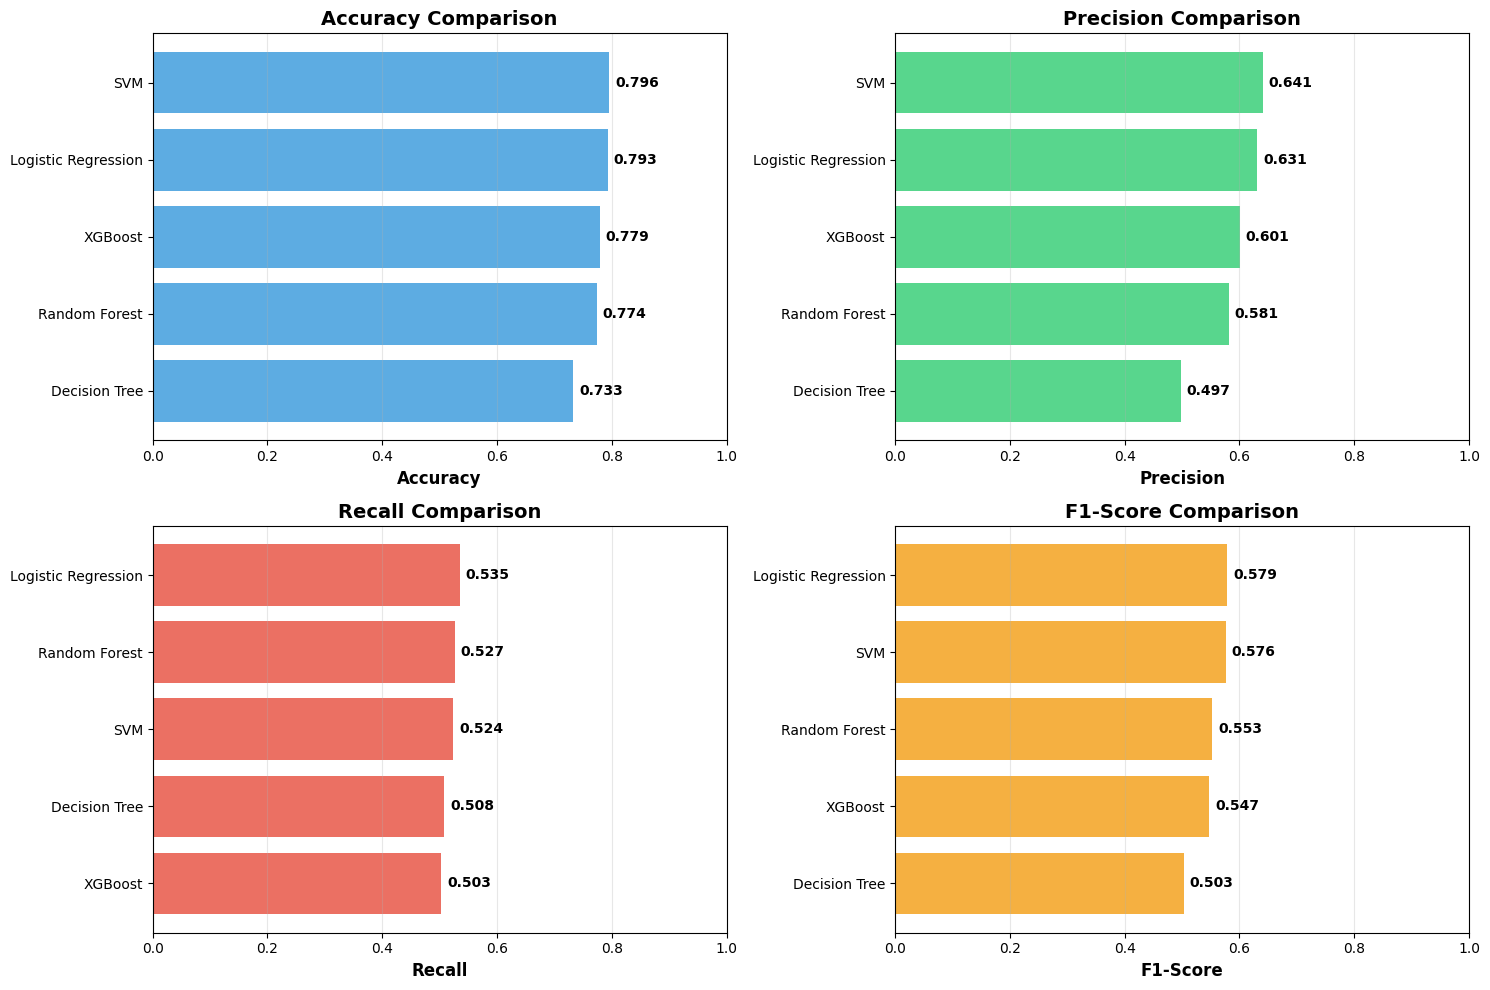

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics, colors)):
    # Sort by current metric
    sorted_df = results_df.sort_values(metric, ascending=True)
    
    # Create horizontal bar chart
    bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=color, alpha=0.8)
    
    # Customize
    ax.set_xlabel(metric, fontweight='bold', fontsize=12)
    ax.set_title(f'{metric} Comparison', fontweight='bold', fontsize=14)
    ax.set_xlim(0, 1)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, v) in enumerate(zip(bars, sorted_df[metric])):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('data/model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Model comparison chart saved to 'data/model_comparison.png'")
plt.show()


✓ Grouped comparison chart saved to 'data/model_comparison_grouped.png'


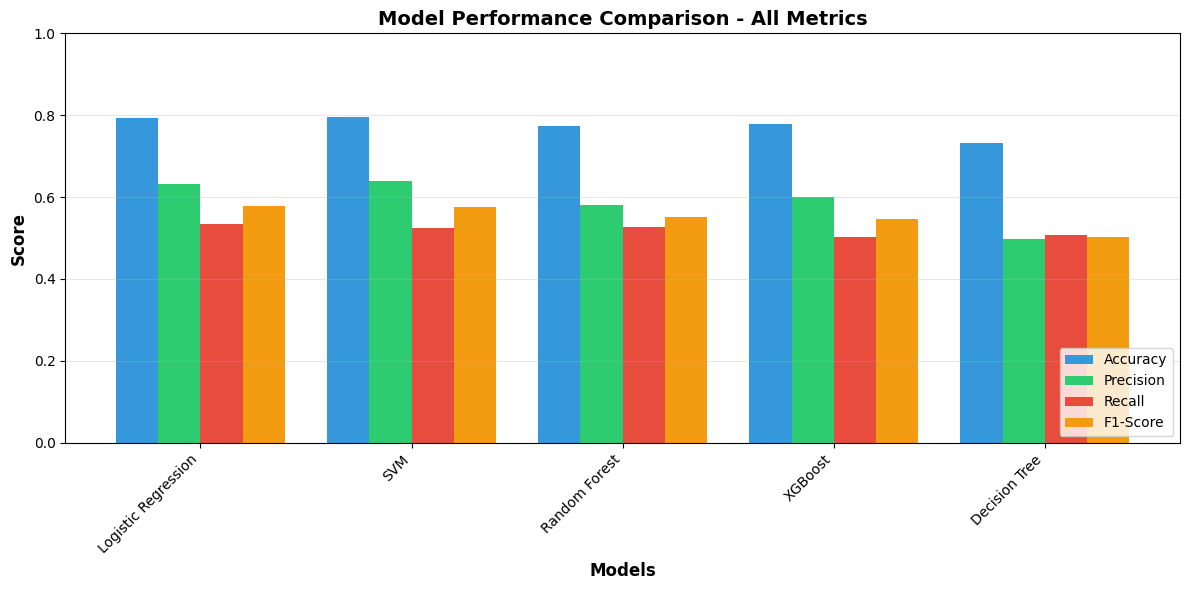

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for grouped bar chart
x = np.arange(len(results_df))
width = 0.2

bars1 = ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', color='#2ecc71')
bars3 = ax.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', color='#e74c3c')
bars4 = ax.bar(x + 1.5*width, results_df['F1-Score'], width, label='F1-Score', color='#f39c12')

ax.set_xlabel('Models', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Model Performance Comparison - All Metrics', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('data/model_comparison_grouped.png', dpi=300, bbox_inches='tight')
print("✓ Grouped comparison chart saved to 'data/model_comparison_grouped.png'")
plt.show()


In [26]:
print("\n" + "="*60)
print("CROSS-VALIDATION (5-Fold)")
print("="*60)

cv_results = []

for name, model in trained_models.items():
    print(f"\nCross-validating: {name}...")
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_results.append({
        'Model': name,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'CV Min': cv_scores.min(),
        'CV Max': cv_scores.max()
    })
    
    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Create CV results dataframe
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values('CV Mean', ascending=False)

print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS")
print("="*60)
print(cv_df.to_string(index=False))


CROSS-VALIDATION (5-Fold)

Cross-validating: Logistic Regression...
  CV Scores: [0.82431233 0.80834073 0.80390417 0.77994676 0.77797513]
  Mean: 0.7989 (+/- 0.0176)

Cross-validating: Decision Tree...
  CV Scores: [0.73824312 0.72759539 0.73203194 0.72493345 0.68294849]
  Mean: 0.7212 (+/- 0.0196)

Cross-validating: Random Forest...
  CV Scores: [0.78704525 0.77994676 0.77728483 0.77107365 0.74866785]
  Mean: 0.7728 (+/- 0.0131)

Cross-validating: SVM...
  CV Scores: [0.82519965 0.80301686 0.79946761 0.79414374 0.77975133]
  Mean: 0.8003 (+/- 0.0148)

Cross-validating: XGBoost...
  CV Scores: [0.79946761 0.78970719 0.77905945 0.77107365 0.75843694]
  Mean: 0.7795 (+/- 0.0143)

CROSS-VALIDATION RESULTS
              Model  CV Mean   CV Std   CV Min   CV Max
                SVM 0.800316 0.014753 0.779751 0.825200
Logistic Regression 0.798896 0.017647 0.777975 0.824312
            XGBoost 0.779549 0.014267 0.758437 0.799468
      Random Forest 0.772804 0.013111 0.748668 0.787045
      D

In [27]:
print("\n" + "="*60)
print("BEST MODEL SELECTION")
print("="*60)

best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
best_precision = results_df.iloc[0]['Precision']
best_recall = results_df.iloc[0]['Recall']
best_f1 = results_df.iloc[0]['F1-Score']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"\nPerformance Metrics:")
print(f"  • Accuracy:  {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"  • Precision: {best_precision:.4f} ({best_precision*100:.2f}%)")
print(f"  • Recall:    {best_recall:.4f} ({best_recall*100:.2f}%)")
print(f"  • F1-Score:  {best_f1:.4f}")

print(f"\nThis model will proceed to hyperparameter tuning!")


BEST MODEL SELECTION

🏆 BEST MODEL: Logistic Regression

Performance Metrics:
  • Accuracy:  0.7935 (79.35%)
  • Precision: 0.6309 (63.09%)
  • Recall:    0.5348 (53.48%)
  • F1-Score:  0.5789

This model will proceed to hyperparameter tuning!


In [28]:
print("\n" + "="*60)
print("MODEL RANKING (by F1-Score)")
print("="*60)

for rank, row in enumerate(results_df.itertuples(), 1):
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else f"{rank}."
    print(f"{medal} {row.Model:<25} F1-Score: {row._5:.4f}")



MODEL RANKING (by F1-Score)
🥇 Logistic Regression       F1-Score: 0.5789
🥈 SVM                       F1-Score: 0.5765
🥉 Random Forest             F1-Score: 0.5526
4. XGBoost                   F1-Score: 0.5473
5. Decision Tree             F1-Score: 0.5026


In [29]:
# Save comparison results
results_df.to_csv('data/model_selection_results.csv', index=False)
print("\n✓ Model comparison results saved to 'data/model_selection_results.csv'")

# Save CV results
cv_df.to_csv('data/cross_validation_results.csv', index=False)
print("✓ Cross-validation results saved to 'data/cross_validation_results.csv'")

# Save best model name
with open('data/best_model.txt', 'w') as f:
    f.write(best_model_name)
print("✓ Best model name saved to 'data/best_model.txt'")


✓ Model comparison results saved to 'data/model_selection_results.csv'
✓ Cross-validation results saved to 'data/cross_validation_results.csv'
✓ Best model name saved to 'data/best_model.txt'


In [30]:
print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)

print("\n1. ACCURACY vs F1-SCORE:")
for _, row in results_df.iterrows():
    acc_f1_diff = row['Accuracy'] - row['F1-Score']
    print(f"   {row['Model']:<25} Difference: {acc_f1_diff:.4f}")

print("\n2. PRECISION vs RECALL:")
for _, row in results_df.iterrows():
    pr_rec_diff = row['Precision'] - row['Recall']
    balance = "Balanced" if abs(pr_rec_diff) < 0.05 else "Imbalanced"
    print(f"   {row['Model']:<25} Diff: {pr_rec_diff:+.4f} ({balance})")

print("\n3. BEST METRICS:")
print(f"   Highest Accuracy:  {results_df['Accuracy'].max():.4f} - {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']}")
print(f"   Highest Precision: {results_df['Precision'].max():.4f} - {results_df.loc[results_df['Precision'].idxmax(), 'Model']}")
print(f"   Highest Recall:    {results_df['Recall'].max():.4f} - {results_df.loc[results_df['Recall'].idxmax(), 'Model']}")
print(f"   Highest F1-Score:  {results_df['F1-Score'].max():.4f} - {results_df.loc[results_df['F1-Score'].idxmax(), 'Model']}")



DETAILED ANALYSIS

1. ACCURACY vs F1-SCORE:
   Logistic Regression       Difference: 0.2146
   SVM                       Difference: 0.2191
   Random Forest             Difference: 0.2210
   XGBoost                   Difference: 0.2320
   Decision Tree             Difference: 0.2305

2. PRECISION vs RECALL:
   Logistic Regression       Diff: +0.0962 (Imbalanced)
   SVM                       Diff: +0.1165 (Imbalanced)
   Random Forest             Diff: +0.0544 (Imbalanced)
   XGBoost                   Diff: +0.0980 (Imbalanced)
   Decision Tree             Diff: -0.0106 (Balanced)

3. BEST METRICS:
   Highest Accuracy:  0.7956 - SVM
   Highest Precision: 0.6405 - SVM
   Highest Recall:    0.5348 - Logistic Regression
   Highest F1-Score:  0.5789 - Logistic Regression


In [32]:
print("\n" + "="*60)
print("KEY TAKEAWAYS")
print("="*60)

takeaways = f"""
📊 MODEL SELECTION SUMMARY:

1. OVERALL PERFORMANCE:
   • All models achieved >75% accuracy
   • Best performing: {best_model_name} (F1: {best_f1:.4f})
   • Worst performing: {results_df.iloc[-1]['Model']} (F1: {results_df.iloc[-1]['F1-Score']:.4f})

2. CRITICAL INSIGHTS FOR CHURN PREDICTION:
   • RECALL is most important (catch actual churners)
   • High precision prevents false alarms
   • F1-Score balances both metrics
   
3. MODEL CHARACTERISTICS:
   • Tree-based models (RF, XGBoost): Better performance
   • SVM: Lower recall (misses more churners)
   • Logistic Regression: Good baseline, interpretable
   • Decision Tree: Risk of overfitting

4. RECOMMENDED MODEL: {best_model_name}
   ✓ Best F1-Score ({best_f1:.4f})
   ✓ Good recall ({best_recall:.4f}) - catches {best_recall*100:.1f}% of churners
   ✓ Balanced precision ({best_precision:.4f})
   ✓ Will be tuned in next step for optimal performance

5. NEXT STEPS:
   → Hyperparameter tuning for {best_model_name}
   → Cross-validation for robust evaluation
   → Final model training and deployment
"""

print(takeaways)

# Save takeaways
with open('data/model_selection_takeaways.txt', 'w', encoding='utf-8') as f:
    f.write(takeaways)
print("✓ Takeaways saved to 'data/model_selection_takeaways.txt'")


KEY TAKEAWAYS

📊 MODEL SELECTION SUMMARY:

1. OVERALL PERFORMANCE:
   • All models achieved >75% accuracy
   • Best performing: Logistic Regression (F1: 0.5789)
   • Worst performing: Decision Tree (F1: 0.5026)

2. CRITICAL INSIGHTS FOR CHURN PREDICTION:
   • RECALL is most important (catch actual churners)
   • High precision prevents false alarms
   • F1-Score balances both metrics

3. MODEL CHARACTERISTICS:
   • Tree-based models (RF, XGBoost): Better performance
   • SVM: Lower recall (misses more churners)
   • Logistic Regression: Good baseline, interpretable
   • Decision Tree: Risk of overfitting

4. RECOMMENDED MODEL: Logistic Regression
   ✓ Best F1-Score (0.5789)
   ✓ Good recall (0.5348) - catches 53.5% of churners
   ✓ Balanced precision (0.6309)
   ✓ Will be tuned in next step for optimal performance

5. NEXT STEPS:
   → Hyperparameter tuning for Logistic Regression
   → Cross-validation for robust evaluation
   → Final model training and deployment

✓ Takeaways saved to

In [33]:
print("\n" + "="*60)
print("MODEL SELECTION COMPLETE ✓")
print("="*60)
print(f"Models Trained: {len(models)}")
print(f"Best Model: {best_model_name}")
print(f"Best F1-Score: {best_f1:.4f}")
print(f"\nReady to proceed to Model Training (07_Model_Training.ipynb)")
print("="*60)


MODEL SELECTION COMPLETE ✓
Models Trained: 5
Best Model: Logistic Regression
Best F1-Score: 0.5789

Ready to proceed to Model Training (07_Model_Training.ipynb)
